# Guía 3 Problema 11: Generador de números aleatorios con distribución exponencial
---------------------------------------------------------------------
*Por Gabriel Goren. L.U.:199/15. FCEN - UBA*

_La variable aleatoria $X$ tiene distribución uniforme en $[0,1]$._

**(a)** _Muestre que $Y = e^X$ tiene distribución $f_Y (t) = 1/t$, $1 \leq t \leq e$. Note que ésto permite escribir una rutina
que genere números con distribución $1/x$._

$Y = e^X \implies X = \log(Y)$ y la relación entre estas dos variables es biyectiva teniendo cuidado con los dominios ($X$ está definida en $[0,1]$, $Y$ está definida en $[1,e]$). Por lo tanto se tiene que

$$ f_Y(y) = f_X(x(y)) \, \bigg| {\frac{dx}{dy}} \bigg| = f_X(\log(y)) \, \frac{1}{y} = \frac{1}{y} $$

donde en el último paso se emplea que $f_X(x) = \frac{1}{1 - 0} = 1 \, \forall x \in [0,1]$.

**(b)** _¿Cómo haría para generar números al azar con distribución exponencial? Impleméntelo en la computadora, construya un histograma con 500 números generados y dibuje sobre éste la distribución teórica. Use λ = 0.25. Hacer esto para dos 2 histogramas: uno con bines de igual ancho en todo el rango (un ancho apropiado para resolver la forma de la distribución) y otro con bines más gruesos a partir de Y ≥ 15. ¿Cómo debe escalear la altura de los bines para que se superponga con la distribución?_

Para generar números al azar con distribución exponencial, queremos que

$$ f_Y(y) = \lambda e^{-\lambda y}. $$

Usando la misma fórmula que antes,

$$ f_Y(y) = f_X(x(y)) \, \bigg| {\frac{dx}{dy}} \bigg| = \bigg| {\frac{dx}{dy}} \bigg| = \lambda e^{-\lambda y} $$

donde en el segundo paso se emplea nuevamente que $f_X(x) = 1 \, \forall x \in [0,1]$. Inspeccionando la última igualdad se observa que

$$ X = e^{- \lambda Y} $$

la satisface, pues entonces $\bigg| {\frac{dx}{dy}} \bigg| = \bigg| -\lambda e^{-\lambda y} \bigg| = \lambda e^{-\lambda y}$, que es lo que buscábamos. De esta forma, invirtiendo la relación entre las variables, llegamos a que la transformación buscada es

$$ Y = -\frac{1}{\lambda} \log(X). $$

Para que el histograma se superponga con la distribución, la altura de los bines debe escalear según

$$ \frac{altura_{i+1}}{altura_{i}} = \frac{\lambda \, e^{-\lambda(y_i + ancho_i)}}{\lambda \, e^{-\lambda \, y_i}} = e^{-\lambda \, ancho} $$

donde $altura_i$ y $ancho_i$ son la altura y el ancho del $i$-ésimo bin respectivamente e $y_i$ es la posición de su borde izquierdo ($y_{i+1} = y_i + ancho_i$).

A continuación se muestra el código empleado y los histogramas obtenidos. 

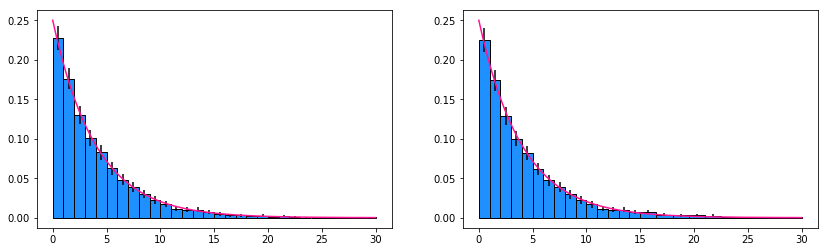

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from math import ceil
%matplotlib inline

# Se grafica en bines equiespaciados y también con bines más gruesos a partir
# de Y = 15


muestras = 5000
l = 0.25 #Esto es el parámetro lambda de la exponencial
ymax = 30
#Número de bines en el primer gráfico (ajusta todos los demás)
numbines = 30

X = uniform(0,1, size=muestras)
Y = -1/l * np.log(X)

ys = np.linspace(0, ymax, 50000)
expo = l * np.exp(-l * ys)

#Comenzamos ploteo
fig = plt.figure(figsize=(14,4))

### Primer gráfico
ax1 = fig.add_subplot(121)


#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
alturas, bordes_bines = np.histogram(Y , bins=numbines, range=(0,ymax), normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
# Normalizamos el error poissoniano para mantener el error relativo:
error = np.sqrt(alturas)/np.sqrt(1000)
# Ahora graficamos el histograma con pyplot:
ancho = ymax/numbines
ax1.bar(centros_bines, alturas, width=ancho, color='dodgerblue', yerr=error,
        edgecolor='black')
# Y la curva teórica:
ax1.plot(ys, expo, color='deeppink')

### Segundo gráfico
ax2 = fig.add_subplot(122)



# Los primeros bines tienen el mismo ancho que los de la otra figura:
ancho_1 = ymax / numbines
# Generamos el número de bines que tendrá este ancho en esta figura:
numbines_1 = ceil(15 / ancho_1)
# Guardamos el valor a partir del cual comenzarán los bines más grandes:
final_1 = ancho_1 * numbines_1
# Vamos a regular con 'a' el ancho de la segunda tanda de bines
a = 1.5
ancho_2 = ancho_1 * a
# Generamos el número de bines con ancho más grande:
numbines_2 = ceil((ymax - final_1) / ancho_2)
# Guardamos el punto hasta el cual llega nuestro histograma
final_2 = final_1 + ancho_2 * numbines_2
# Creamos los bordes de los bines::
bines_1    = np.array([i * ancho_1 for i in range(numbines_1)])
bines_2    = final_1 + np.array([i * ancho_2 for i in range(numbines_2 + 1)])
bordes_bines  = np.concatenate((bines_1, bines_2), axis=0)
# Hacemos que bines_2 tenga un elemento más que numbines_2 porque el último
# elemento de bordes_bines debe ser el borde derecho del último bin.

# Por último generamos una lista con el ancho de cada bin
losanchos = [ancho_1 for i in range(numbines_1)] + [ancho_2 for i in range(numbines_2)]

### Ploteamos igual que antes:
    
#Generamos las alturas y los bordes de los bines. Normalizamos el área a 1
alturas, bordes_bines = np.histogram(Y , bins=bordes_bines, range=(0,final_2), normed=True)
# A partir de los bordes de los bines, generamos una lista de los centros de
# los bines, requerida por la función pyplot.bar:
centros_bines = 0.5*(bordes_bines[1:]+bordes_bines[:-1])
# Normalizamos el error poissoniano para mantener el error relativo:
error = np.sqrt(alturas)/np.sqrt(1000)
# Ahora graficamos el histograma con pyplot:
ax2.bar(centros_bines, alturas, width=losanchos, color='dodgerblue', yerr=error,
        edgecolor='black')
# Y la curva teórica:
ys = np.linspace(0, final_2, 50000)
ax2.plot(ys, expo, color='deeppink')

### Ojo: este código no funciona si ymax < 15.
### El segundo histograma termina en y = final_2, un poco después de y = ymax
### (recordar que y son las abcisas), así como el punto de corte entre los bines
### con ancho_1 y los bines con ancho_2 es y = final_1 que es un poco más grande
### que y = 15. Sin embargo estas diferencias son pequeñas y no impiden realizar
### una comparación entre el primer y el segundo gráfico.

Encontré que con un número de bines alrededor de 35 para el rango de valores de $Y$ entre 0 y 35 la altura de los bines se pegaba bastante bien a la curva exponencial. Al modificar el ancho de los bines a partir de $Y = 15$, observé que si el nuevo ancho era mayor a dos veces el ancho inicial los bines comenzaban a ser demasiado altos y se alejaban sustancialmente de la curva, mientras que si el nuevo ancho tenía un ancho de entre 1 y 2 veces el ancho inicial, no había demasiada diferencia entre un gráfico y el otro. Entiendo que la idea de modificar el ancho de los bines era evitar que el histograma se despegara de la curva en la región de menor probabilidad debido a que, al caer menos puntos allí, muchos bines tuviesen cero entradas. Sin embargo no logré encontrar una proporción entre los anchos antes y después de $Y = 15$ que mejorara visiblemente la adecuación del histograma a la curva.

# Corrección

De los últimos histogramas, el de la izquierda (con bins de igual ancho) tiene mal calculado los errores. El de la derecha, además está mal normalizado. La idea es que el histograma (normalizado) represente a la densidad de probabilidad de la variable aleatoria, independientemente de como sean los anchos de los bins.

### Normalización

Sea $Y_i$ la variable aleatoria correspondiente a la cantidad de datos en el bin $i$ de ancho $w_i$ de un histograma. El histograma representa a una densidad de probabilidad (para alguna variable aleatoria $X$), y para que esté normalizada, esta tiene que integrar a 1. Entonces, queremos normalizar a los $Y_i \mapsto y_i$ tal que
$$ 1 = \int f_X(t) \, dt \approx \sum_i w_i \, y_i $$
donde aproximamos la integral por la suma de las areas de los bins.

Ahora, una forma de normalizar sería dividir a todos los $Y_i$ por $\sum_j w_j Y_j$:

$$ \sum_i w_i y_i = \sum_i w_i \frac{Y_i}{\sum_j w_j Y_j} = \frac{1}{\sum_j w_j Y_j} \sum_i w_i Y_i = 1 $$

La integral da bien, pero esta normalización no representa la densidad de probabilidad cuando los bins son de distinto ancho.

En cambio, si normalizamos a cada bin por su ancho y por la cantidad total de datos en el histograma:

$$ Y_i \mapsto \frac{Y_i}{w_i \sum_j Y_j} = \frac{Y_i}{w_i N} = y_i $$

donde $N$ es la cantidad total de datos, esta normalización también integra a 1:

$$ \sum_i w_i y_i = \sum_i w_i \frac{Y_i}{w_i \sum_j Y_j} = \frac{\sum_i Y_i}{\sum_j Y_j} = 1 $$

y representa correctamente a la densidad de probabilidad cuando los anchos son distintos (ver figuras abajo).

Nota: Para que la función numpy.histogram normalize correctamente cuando el ancho de los bins es variable hay que usar **density=True**, y no **normed=True** (ver el help de la función).

### Normalización de los errores

$$ Y_i \pm \sqrt{Y_i} \mapsto \frac{Y_i}{w_i \sum_j Y_j} \pm \frac{\sqrt{Y_i}}{w_i \sum_j Y_j} = y_i \pm \sqrt{\frac{y_i}{w_i \sum_j Y_j}} $$

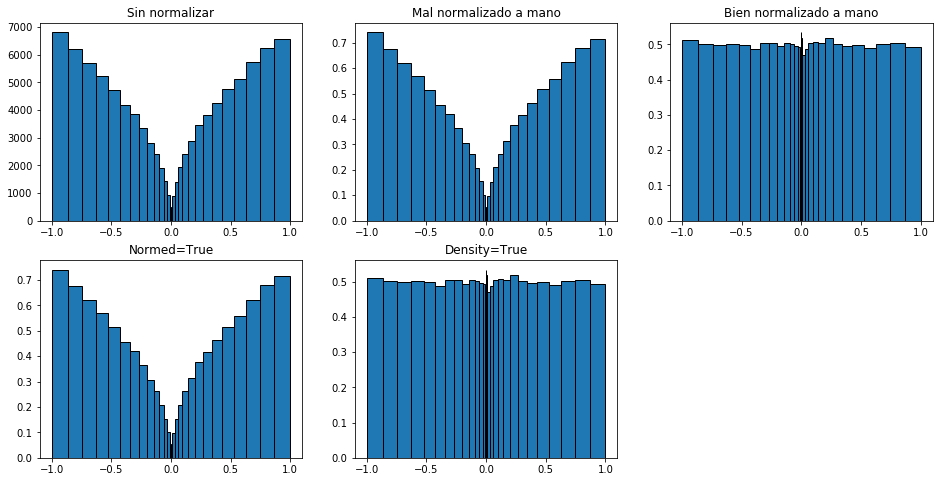

In [37]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

X = 2 * np.random.rand(100000) - 1

bins = np.linspace(-1, 1, 30)
bins = np.sign(bins) * bins**2
w = np.diff(bins) # Ancho de los bins

Y = np.histogram(X, bins=bins)[0] # Histograma sin normalizar
y_mal = Y / (np.sum(w*Y)) # Mal normalizado a mano
y_bien = Y / (np.sum(Y) * w) # Bien normalizado a mano
y_normed = np.histogram(X, bins=bins, normed=True)[0] # Histograma mal normalizado (cuando los bins no son constantes)
y_density = np.histogram(X, bins=bins, density=True)[0] # Histograma bien normalizado

f, axes = plt.subplots(2, 3, figsize=(16,8))
for ax, x, title in zip(axes.flat,
                 [Y, y_mal, y_bien, y_normed, y_density],
                 ['Sin normalizar', 'Mal normalizado a mano','Bien normalizado a mano', 'Normed=True', 'Density=True']):
    ax.bar(bins[:-1], x, width=w, align='edge', ec='k')
    ax.set_title(title)
    
axes[-1,-1].set_axis_off()